<a href="https://colab.research.google.com/github/ahmadbadawikr/DS_and_ML/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
y_train[100]

5

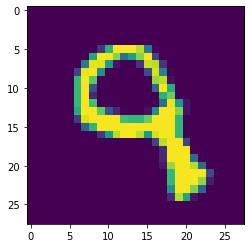

In [ ]:
plt.imshow(x_test[4000].reshape(28, 28))

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
y_train[100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='relu' ))
model.add(Conv2D(128, (3,3), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation=Activation(tf.nn.softmax)))

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as Activation) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 433s 7ms/step - loss: 0.5472 - accuracy: 0.9165 - val_loss: 0.0696 - val_accuracy: 0.9787
Epoch 2/5
60000/60000 [==============================] - 433s 7ms/step - loss: 0.0933 - accuracy: 0.9738 - val_loss: 0.0453 - val_accuracy: 0.9860
Epoch 3/5
60000/60000 [==============================] - 430s 7ms/step - loss: 0.0643 - accuracy: 0.9822 - val_loss: 0.0307 - val_accuracy: 0.9898
Epoch 4/5
60000/60000 [==============================] - 427s 7ms/step - loss: 0.0494 - accuracy: 0.9857 - val_loss: 0.0303 - val_accuracy: 0.9910
Epoch 5/5
60000/60000 [==============================] - 427s 7ms/step - loss: 0.0397 - accuracy: 0.9883 - val_loss: 0.0321 - val_accuracy: 0.9904


In [ ]:
model.predict(x_test[5200].reshape(1, 28, 28, 1))

array([[7.79316011e-13, 1.32941125e-08, 3.07430192e-10, 1.33700169e-12,
        9.99995947e-01, 7.14801690e-11, 4.34110144e-11, 1.86656042e-08,
        1.44018530e-09, 4.08361666e-06]], dtype=float32)